In [1]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Read, process and merge dataframes

In [3]:
df_opinion = pd.read_csv("../haaleandja/data_kandidaatide_vastused.csv")
df_opinion

,name,party,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,...,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29
0,Raimond Kaljulaid,SDE,2.0,4.0,2.0,3.0,NaN,3.0,1.0,NaN,...,4.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,4.0,4.0
1,Katrin Helendi,Reformierakond,2.0,1.0,3.0,3.0,2.0,3.0,3.0,NaN,...,3.0,NaN,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Ivi Eenmaa,Reformierakond,2.0,1.0,1.0,4.0,3.0,4.0,3.0,3.0,...,3.0,3.0,1.0,1.0,3.0,3.0,3.0,4.0,3.0,2.0
3,Tiit Soorm,Reformierakond,2.0,1.0,1.0,3.0,3.0,3.0,4.0,2.0,...,3.0,3.0,1.0,2.0,2.0,3.0,4.0,2.0,4.0,2.0
4,Sander Andla,Reformierakond,2.0,1.0,1.0,4.0,1.0,2.0,3.0,2.0,...,3.0,1.0,1.0,2.0,4.0,4.0,3.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Maarja Metstak,Reformierakond,1.0,1.0,1.0,3.0,1.0,4.0,1.0,4.0,...,4.0,3.0,1.0,2.0,4.0,4.0,3.0,3.0,4.0,3.0
612,Rain Epler,EKRE,2.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,...,2.0,2.0,1.0,2.0,3.0,1.0,4.0,4.0,1.0,2.0
613,Laura Kiviselg,Reformierakond,3.0,1.0,1.0,3.0,2.0,3.0,1.0,4.0,...,3.0,2.0,1.0,2.0,2.0,4.0,4.0,3.0,4.0,3.0
614,Marti Kuusik,EKRE,3.0,2.0,4.0,3.0,4.0,3.0,3.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0


In [4]:
df_election = pd.read_csv("../RK_2023/RK_2023_election_results.csv", sep = ";")
df_election

,party,candidate_nr,candidate_name,candidate_votes,candidate_position,party_votes_const,prop_candidate_votes_party,prop_candidate_votes_constituency,constituency
0,Eesti Keskerakond,910,VADIM BELOBROVTSEV,3231,2,12870,"0,251048951048951","0,0524427852621328",1
1,Eesti Keskerakond,912,ANASTASSIA KOVALENKO-KÕLVART,2806,4,12870,"0,218026418026418","0,0455445544554455",1
2,Eesti Keskerakond,909,TANEL KIIK,2070,1,12870,"0,160839160839161","0,0335984418113943",1
3,Eesti Keskerakond,917,OLEG SILJANOV,1213,9,12870,"0,0942501942501942","0,0196883622788508",1
4,Eesti Keskerakond,911,MAREK JÜRGENSON,738,3,12870,"0,0573426573426573","0,011978574906671",1
...,...,...,...,...,...,...,...,...,...
963,Sotsiaaldemokraatlik Erakond,532,MARK SOOSAAR,259,8,2938,"0,0881552076242342","0,00590353756382203",12
964,Sotsiaaldemokraatlik Erakond,531,REIN KONTUS,141,7,2938,"0,0479918311776719","0,00321389496717724",12
965,Sotsiaaldemokraatlik Erakond,527,SILVER TAMBUR,138,3,2938,"0,0469707283866576","0,00314551422319475",12
966,Sotsiaaldemokraatlik Erakond,530,EHA RISTIMETS,123,6,2938,"0,0418652144315861","0,00280361050328228",12


In [5]:
# change party names so they match in dataframes

df_opinion.replace({"party" : {
    "Reformierakond": "REF",
    "SDE": "SDE",
    "EKRE": "EKRE",
    "Keskerakond": "KESK",
    "Parempoolsed": "PAR",
    "Isamaa": "ISA",
    "Rohelised": "ROH",
    "Eesti 200": "E200",
    "Eestimaa Ühendatud Vasakpartei": "VAS",
    "Üksikkandidaat": "ÜKS"}}, inplace = True)

df_election.replace({"party" : {
    "Eesti Reformierakond": "REF",
    "Sotsiaaldemokraatlik Erakond": "SDE",
    "Eesti Konservatiivne Rahvaerakond": "EKRE",
    "Eesti Keskerakond": "KESK",
    "Erakond Parempoolsed": "PAR",
    "ISAMAA Erakond": "ISA",
    "Erakond Eestimaa Rohelised": "ROH",
    "Erakond Eesti 200": "E200",
    "EESTIMAA ÜHENDATUD VASAKPARTEI": "VAS",
    "Üksikkandidaadid": "ÜKS"}}, inplace = True)

# uppercase candidate names
df_opinion['name'] = df_opinion['name'].str.upper()

# merge dataframes
df_election.rename(columns={"candidate_name": "name"}, inplace = True)
df_merged = df_opinion.merge(df_election, on = ["name", "party"])

# add color to parties
party_to_color = {
    "REF": "#ffc000",
    "SDE": "#e35558",
    "EKRE": "#2a3da0",
    "KESK": "#3bac7b",
    "PAR": "darkorange",
    "ISA": "#6fabd4",
    "ROH": "lime",
    "E200": "#008080",
    "VAS": "darkred",
    "ÜKS": "gray"
}

df_merged["color"] = df_merged.party.map(party_to_color)

In [6]:
df_merged

,name,party,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,...,Q_28,Q_29,candidate_nr,candidate_votes,candidate_position,party_votes_const,prop_candidate_votes_party,prop_candidate_votes_constituency,constituency,color
0,RAIMOND KALJULAID,SDE,2.0,4.0,2.0,3.0,NaN,3.0,1.0,NaN,...,4.0,4.0,409,1819,1,6165,"0,295052716950527","0,0295244278526213",1,#e35558
1,KATRIN HELENDI,REF,2.0,1.0,3.0,3.0,2.0,3.0,3.0,NaN,...,3.0,3.0,794,156,11,19346,"0,0080636824149695","0,00253205648433696",1,#ffc000
2,IVI EENMAA,REF,2.0,1.0,1.0,4.0,3.0,4.0,3.0,3.0,...,3.0,2.0,810,348,15,22012,"0,0158095584226785","0,00465159798430754",2,#ffc000
3,TIIT SOORM,REF,2.0,1.0,1.0,3.0,3.0,3.0,4.0,2.0,...,4.0,2.0,808,64,13,22012,"0,00290750499727421","0,000855466295964605",2,#ffc000
4,SANDER ANDLA,REF,2.0,1.0,1.0,4.0,1.0,2.0,3.0,2.0,...,4.0,3.0,806,301,11,22012,"0,0136743594403053","0,00402336492320853",2,#ffc000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,MAARJA METSTAK,REF,1.0,1.0,1.0,3.0,1.0,4.0,1.0,4.0,...,4.0,3.0,831,406,11,42277,"0,00960333041606547","0,003845206750895",4,#ffc000
611,RAIN EPLER,EKRE,2.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,...,1.0,2.0,640,3366,1,11759,"0,286248830682881","0,0758056888048105",11,#2a3da0
612,LAURA KIVISELG,REF,3.0,1.0,1.0,3.0,2.0,3.0,1.0,4.0,...,4.0,3.0,907,1107,8,12955,"0,0854496333461984","0,0252324945295405",12,#ffc000
613,MARTI KUUSIK,EKRE,3.0,2.0,4.0,3.0,4.0,3.0,3.0,1.0,...,2.0,2.0,598,790,2,5779,"0,136701851531407","0,0279379000601195",6,#2a3da0


In [7]:
(df_merged.candidate_votes > 1000).sum()

106

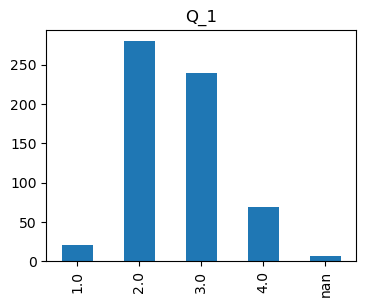

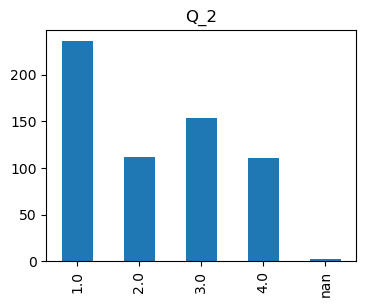

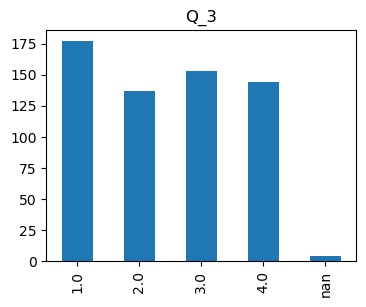

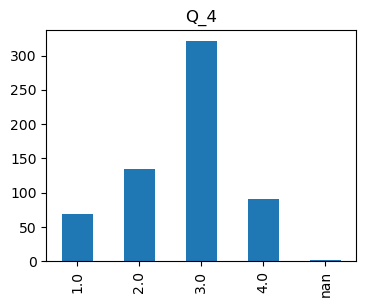

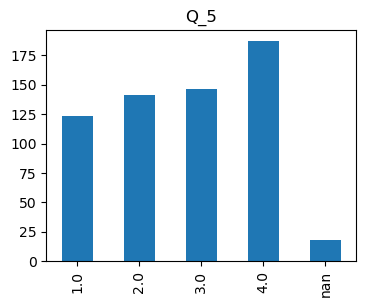

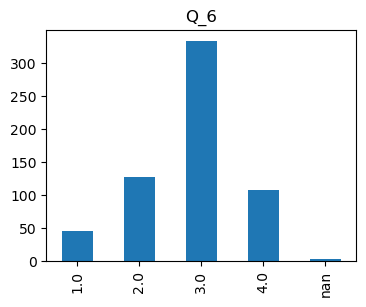

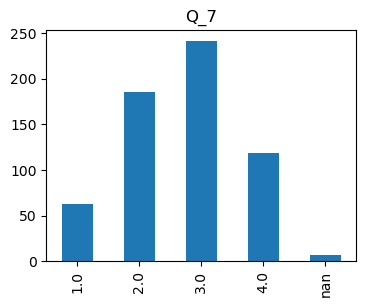

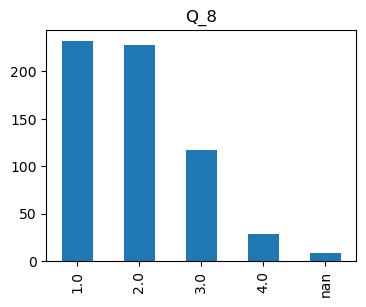

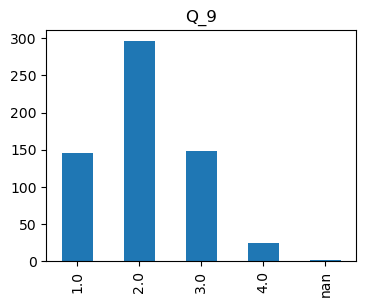

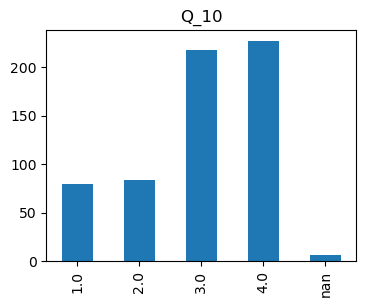

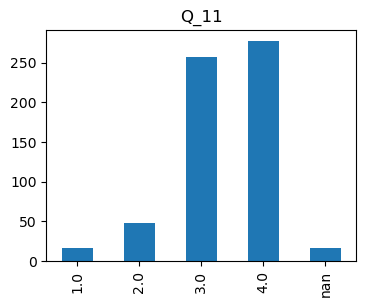

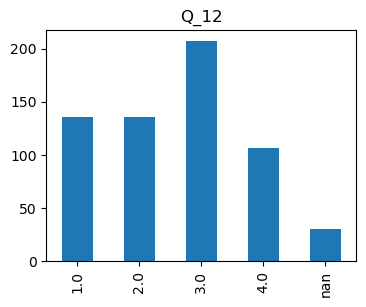

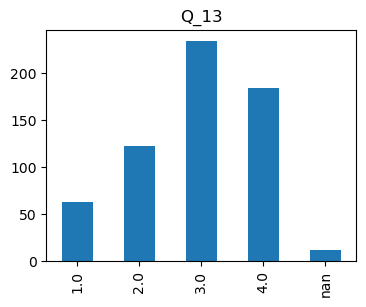

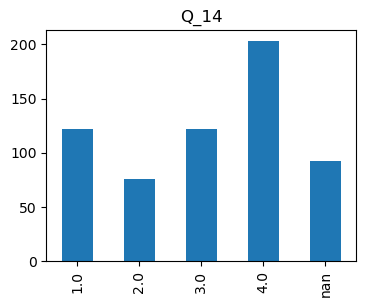

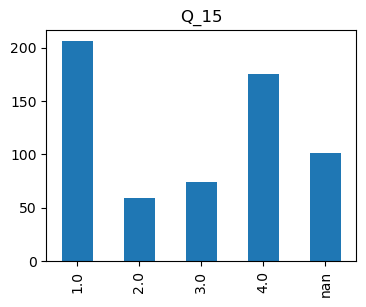

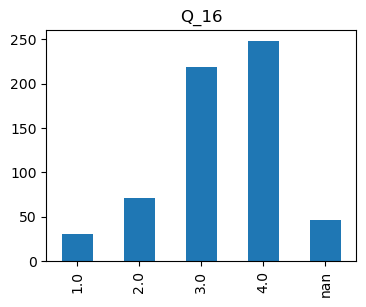

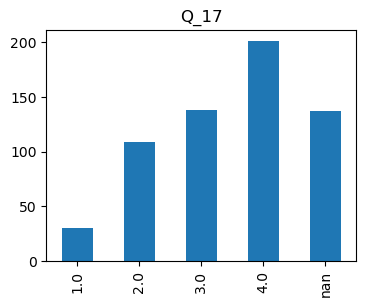

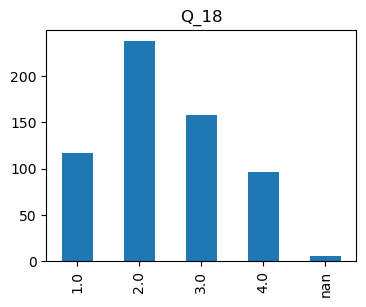

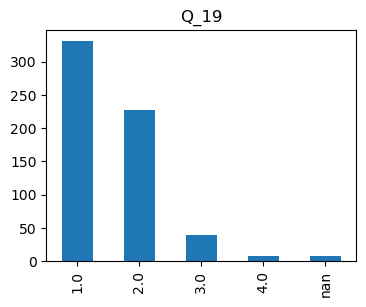

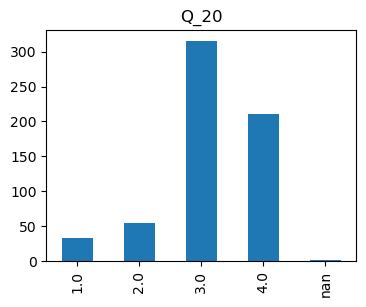

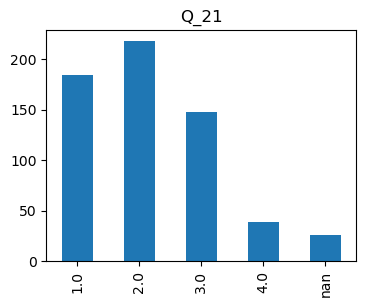

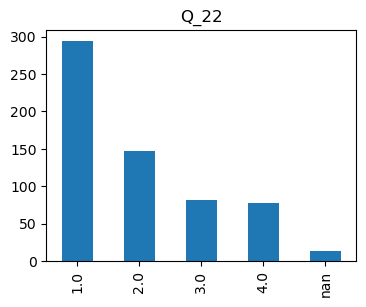

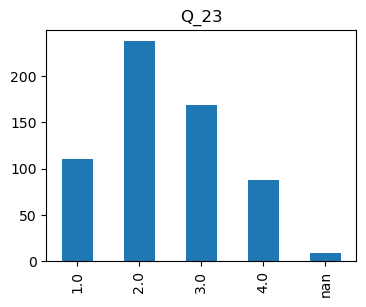

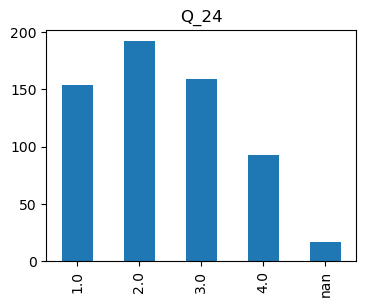

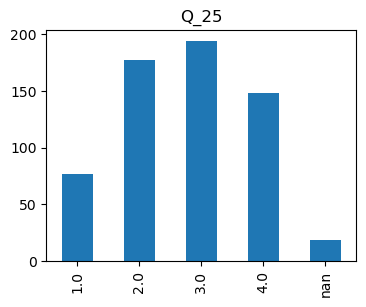

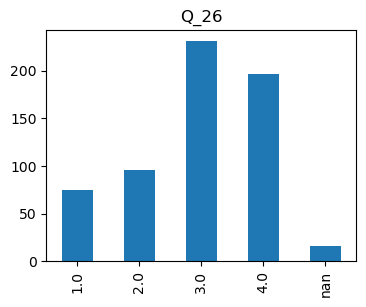

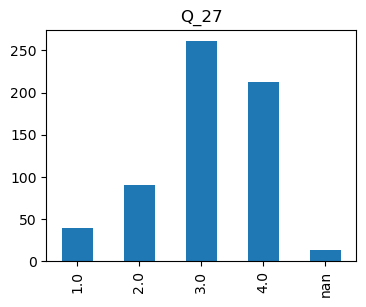

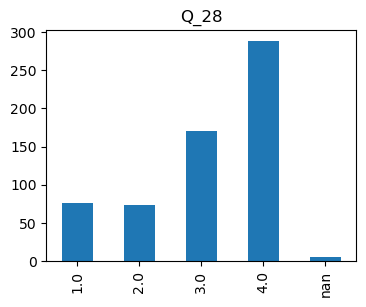

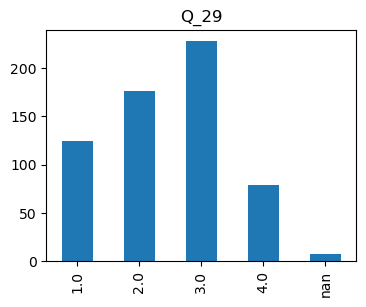

In [8]:
for i in range(1, 30):
    q = "Q_" + str(i)
    df_merged[q].value_counts(dropna = False).sort_index().plot.bar(figsize=(4,3), title = q)
    plt.show()

## Constructing an opinion similarity network

All the questions are phrased so that the answers are given on a scale: 1 - no, 2 - rather no, 3 - rather yes, 4 - yes

Based on these answers we can calculate opinion similarity scores between all of the candidates.
We use the following scoring system:

2 points for every exactly matching opinion (candidates answered 1-1, 2-2, 3-3 or 4-4)  
1 point for every softly matching opinion (candidates answered 1-2, 2-1, 3-4 or 4-3)  
0 points for non matching opinons (including if one of the candidates didn't answer at all)  

We consider two candidates to have a similar opinion if their opinion similarity score is over some threshold alpha.

We then form a network based on similar opinions.

In [ ]:
# First calculate the similarity matrix between all the candidates
# Takes about 6 minutes to calculate

# df_sim1 = df_merged.iloc[:, 2:30]

# df_sim2 = df_sim1.copy()
# df_sim2.replace({1: -1, 2: -1, 3: 1, 4: 1}, inplace = True)

# df_similarities = []
# for i in range(df_sim1.shape[0]):
#     row_similarities = []
#     for j in range(df_sim1.shape[0]):
#         if i == j: # Distance to self is coded as 0
#             score = 0
#         else:
#             score = sum((df_sim1.iloc[i] == df_sim1.iloc[j])*1 + ((df_sim2.iloc[i] - df_sim2.iloc[j]) == 0)*1)
#         row_similarities.append(score)
#     df_similarities.append(row_similarities)

In [9]:
#df_sim = pd.DataFrame(df_similarities)

# Save similarities to .csv file, so next time we can just read them in
#df_sim.to_csv("opinion_similarities.csv", index = False)
df_sim = pd.read_csv("opinion_similarities.csv")

df_sim

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,612,613,614
0,0,20,23,22,21,29,27,27,27,25,...,17,14,29,21,28,27,16,31,18,25
1,20,0,29,29,27,32,30,34,27,27,...,29,26,19,20,23,26,21,24,26,27
2,23,29,0,29,30,36,32,35,28,33,...,26,17,18,28,21,29,22,24,23,28
3,22,29,29,0,30,28,36,35,31,36,...,31,24,24,29,28,27,26,30,27,26
4,21,27,30,30,0,24,35,32,32,32,...,24,21,25,42,25,32,19,31,21,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,27,26,29,27,32,36,30,30,35,28,...,20,17,38,39,32,0,13,43,16,27
611,16,21,22,26,19,21,24,24,18,31,...,32,31,11,14,11,13,0,16,37,23
612,31,24,24,30,31,36,34,31,37,28,...,23,20,34,37,31,43,16,0,22,26
613,18,26,23,27,21,28,33,25,21,34,...,47,30,15,14,14,16,37,22,0,20


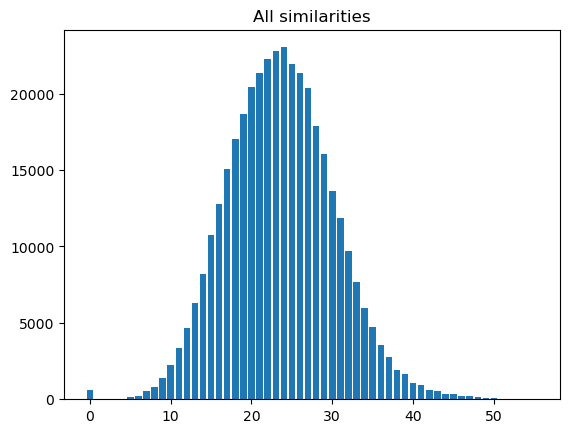

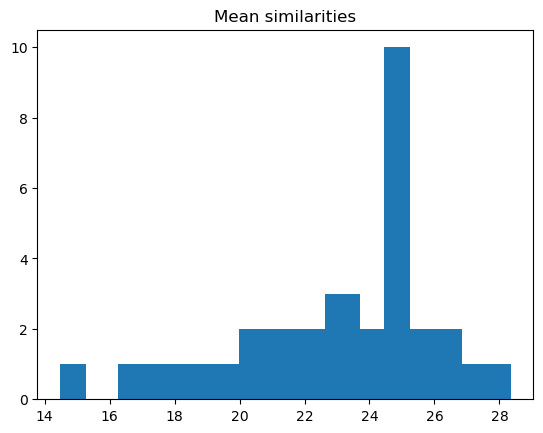

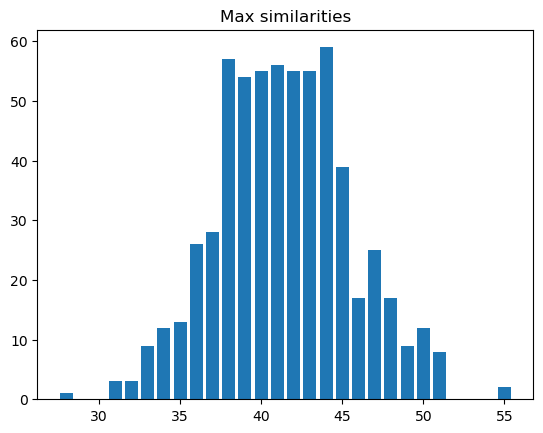

In [65]:
# Visualize similarities in the dataset

# All similarities

all_sim = df_sim.to_numpy().ravel()
unique, counts = np.unique(all_sim, return_counts=True)
plt.bar(unique, counts)
plt.title("All similarities")
plt.show()

# Candidates mean and max similarities

mean_sim = df_sim.mean(axis=1)
unique, counts = np.unique(mean_sim, return_counts=True)
plt.bar(unique, counts)
plt.title("Mean similarities")
plt.show()

max_sim = df_sim.max(axis=1)
unique, counts = np.unique(max_sim, return_counts=True)
plt.bar(unique, counts)
plt.title("Max similarities")
plt.show()

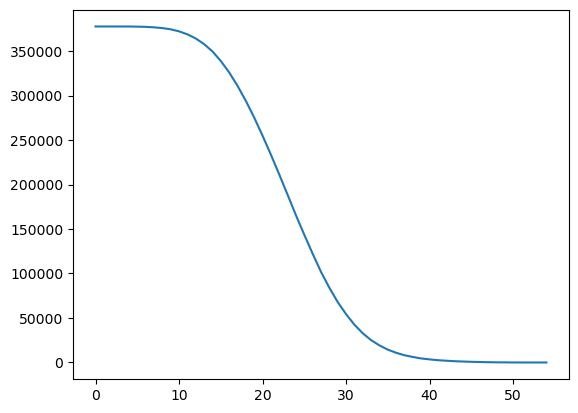

[(0, 377610), (1, 377608), (2, 377608), (3, 377604), (4, 377570), (5, 377434), (6, 377198), (7, 376640), (8, 375820), (9, 374424), (10, 372162), (11, 368792), (12, 364156), (13, 357834), (14, 349616), (15, 338850), (16, 326068), (17, 311030), (18, 294004), (19, 275360), (20, 254948), (21, 233618), (22, 211362), (23, 188550), (24, 165526), (25, 143600), (26, 122282), (27, 101920), (28, 84032), (29, 67986), (30, 54362), (31, 42500), (32, 32826), (33, 25136), (34, 19194), (35, 14470), (36, 10890), (37, 8130), (38, 6196), (39, 4532), (40, 3490), (41, 2580), (42, 1966), (43, 1452), (44, 1078), (45, 764), (46, 522), (47, 314), (48, 180), (49, 108), (50, 12), (51, 2), (52, 2), (53, 2), (54, 2)]


In [11]:
# Choosing alpha based on how many edges would be present in the dataset
edge_counts = []
for a in range(55):
    edge_counts.append((df_sim > a).sum().sum())
plt.plot(edge_counts)
plt.show()
print([(a,b) for a, b in zip(range(55), edge_counts)])

In [50]:
# Constructing edges for the network
alpha = 38
edges_list = []
for i in range(df_sim.shape[0]):
    for j in range(df_sim.shape[1]):
        if df_sim.iloc[i, j] >= alpha:
            edges_list.append((i, j))

In [51]:
# Node attributes
att_dict = {}
for i in range(df_merged.shape[0]):
    row_dict = df_merged.iloc[i].to_dict()
    att_dict[i] = {key: row_dict[key] for key in ["name", "party", "candidate_votes", "color"]}

In [52]:
G = nx.from_edgelist(edges_list)
nx.set_node_attributes(G, att_dict)

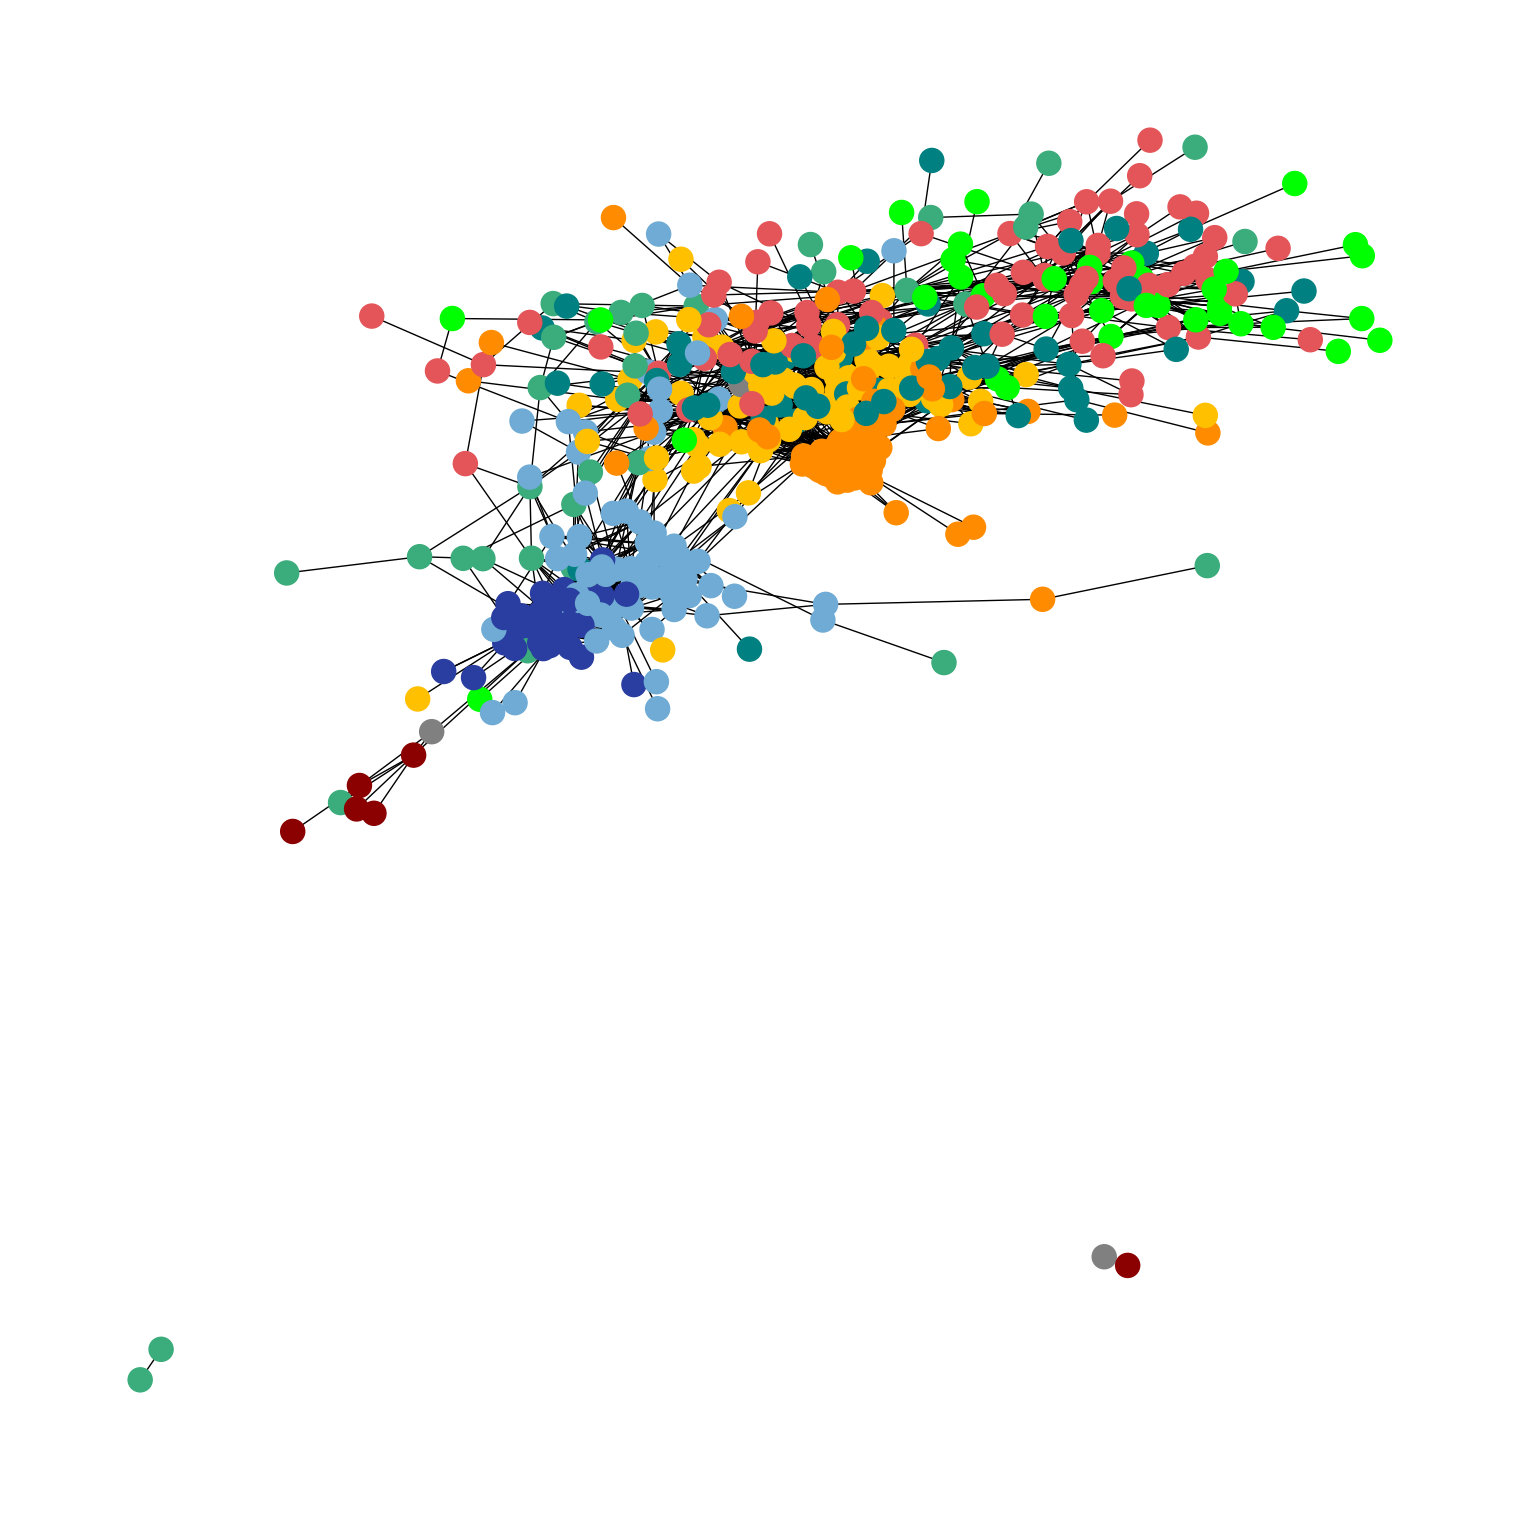

In [60]:
colors_graph = [G.nodes[node]["color"] for node in list(G.nodes())]
labels_graph = nx.get_node_attributes(G, "name")
sizes_graph  = [G.nodes[node]["candidate_votes"]/2 for node in list(G.nodes())]
plt.figure(1,figsize=(15,15)) 
nx.draw(G, node_color = colors_graph)
plt.show()

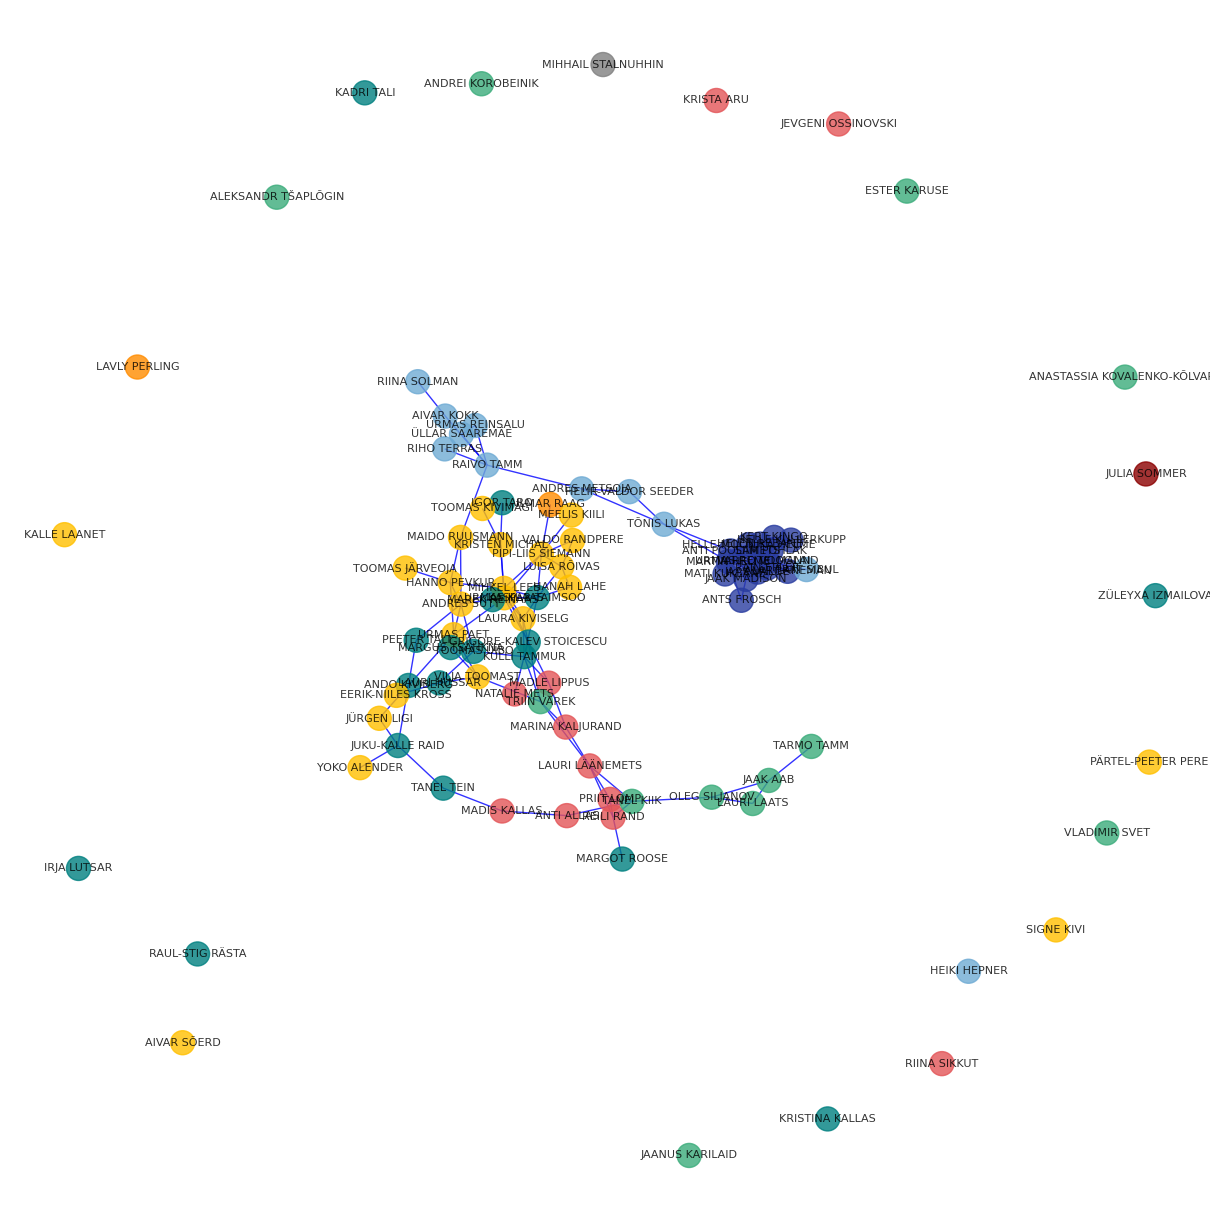

In [61]:
# Create smaller graph with only most popular candidates

chosen_nodes = [node for node in list(G.nodes()) if G.nodes[node]["candidate_votes"] > 1000]
G2 = G.subgraph(chosen_nodes)

colors_graph = [G2.nodes[node]["color"] for node in list(G2.nodes())]
labels_graph = nx.get_node_attributes(G2, "name")
sizes_graph  = [G2.nodes[node]["candidate_votes"]/5 for node in list(G2.nodes())]
plt.figure(2,figsize=(12,12)) 
nx.draw(G2, pos = nx.fruchterman_reingold_layout(G2), with_labels = True, node_color = colors_graph, labels = labels_graph, 
        alpha = 0.8, edge_color='b', font_size = 8, width = 1)
plt.show()
